# Remote Work & Mental Health 🌍🧠

This dataset cames from the [Kaggle](https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health).

This dataset examines the impact of remote work on mental health, gathering responses from individuals across various demographics. It includes key metrics such as job satisfaction, anxiety levels, and work-life balance.

Index:
1. [Reading the Data](#1.-Reading-the-Data)
2. [Data Cleaning](mental_health.ipynb#data-cleaning)

Hipóteses

1. objetivo: estudar o impacto do remote work na nossa saude mental

2
a) detalhar a população a nível pessoal: x pessoas, percentagem de cada genero (Gender) e utilizar Region e Year  
b) detalhar a população a nível de trabalho e no work location  

3) testar hipóteses:
   - será que existe regiões onde o remote work impacta mais a nossa saúde mental?
   - verificar se existe profissões onde trabalhar remotamente impacta mais a nossa saude mental?
   - será que o número de reuniões e/ou número de horas tem efeito?
   - será que praticar desporto e/ou dormir bem tem impacto?
   - será que existe uma correlação entre pessoas novas e doenças mentais? (+ novas, +probabilidade de doenças?)
   - será que é possível encontrar um perfil mais provavel de não se adaptar bem ao remote work?
   - será que as pessoas com maior social isolation rating estão mais satisfeitas com o remote work?
   ou pode levar situações de stress e ansiedade?



## Reading the data

In [2]:
import pandas as pd

In [3]:
file = "kaggle/input/Impact_of_Remote_Work_on_Mental_Health.csv"
df = pd.read_csv(file, encoding="utf-8")

df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [10]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

## Dataset Descriptive Statistics

In [7]:
print('População')
print('--'*20)
print(f'Total de pessoas: {df.shape[0]}')
print(f'Média de idade: {df["Age"].mean():.0f}')
print(f'Média de anos de experiência: {df["Years_of_Experience"].mean():.0f}')

População
----------------------------------------
Total de pessoas: 5000
Média de idade: 41
Média de anos de experiência: 18


----------------------------------------


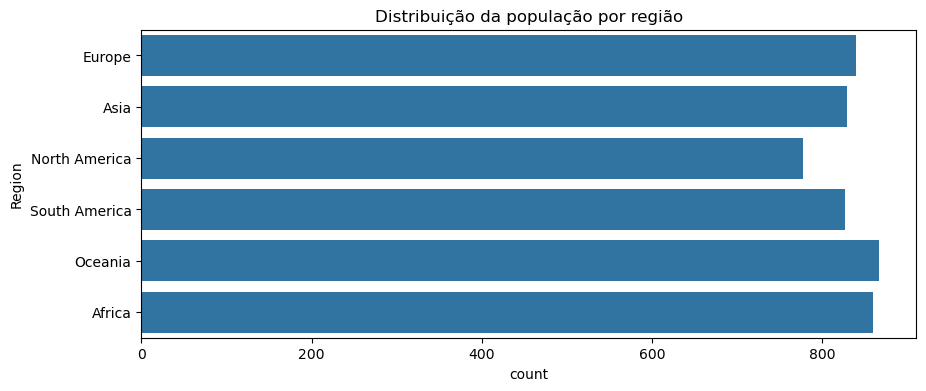

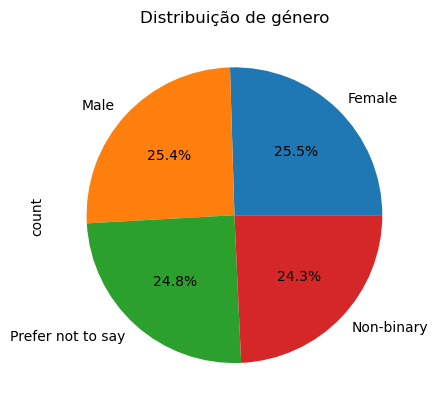

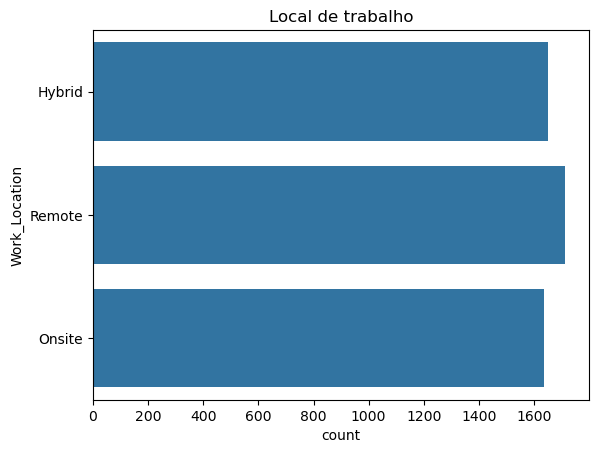

In [8]:
print('--'*20)
# Bar chart of region distribution using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.countplot(data=df, y='Region')
plt.title('Distribuição da população por região')
plt.show()

# Gender
df.Gender.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribuição de género')

plt.show()

# Work Location
sns.countplot(data=df, y='Work_Location')
plt.title('Local de trabalho')

plt.show()

In [6]:
# Dataframe describe
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


## Data Cleaning

In [57]:
print('Verificar se existem valores nulos')
print('--'*20)
df.isna().sum()

Verificar se existem valores nulos
----------------------------------------


Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

There are empty values for the columns Mental_Health_Condition and Physical_Activity.

These values make sense, as they mean absence of mental health condition and absence of physical activity.

Thus, we will fill these empty values with the string "None".

## Plotting

## Model Selection, Feature Engineering, and Normalization

## Machine Learning